In [7]:
%matplotlib inline


# -*- coding: utf-8 -*-
"""
Created on Sat Dec  7 15:12:27 2019

@author: Steve Alley
"""
import matplotlib.pyplot as plt
#import magpylib as magpy
from numpy import linspace, array, meshgrid, log, cos, sin, radians
import magpylib as magpy
from Triangle import Triangle
from Trimag import Trimag



Making moebius using 24 magnets spaced 15.0 degrees apart.
Rotation about z: 90


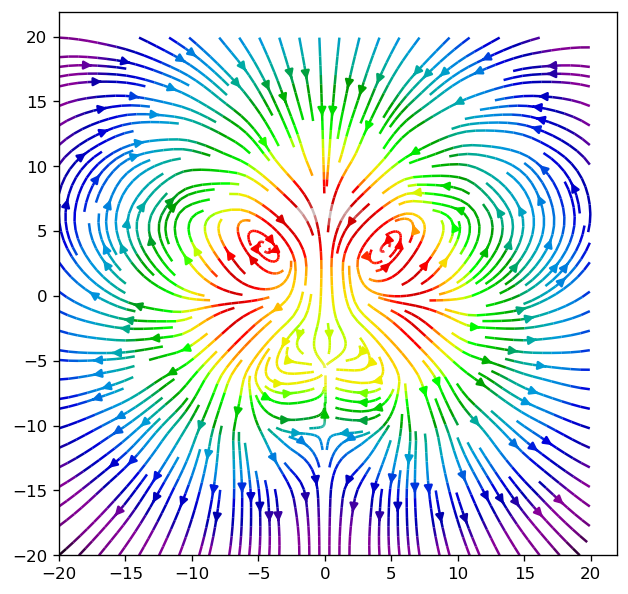

                       Y-Z PLANE (FRONT VIEW): X=0


In [2]:

if __name__ == '__main__':
    #Magnitize the magnets all on the same axis.
    num_mags = 24
    mag = [0, 1, 0]
    
    #Set the number of degrees to rotate around.
    theta = .0
    beta = 360 / num_mags
    
    
    
    moebius = magpy.Collection()

    
    print('Making moebius using {} magnets spaced {} degrees apart.'.format(num_mags, beta))
    
    for source in range(0, num_mags, 1):

        
        # Apply the Moebius Formula...
        
        R = 6 # radius
        s = 0 # s in subset of {-w, w} (Zero aligns the center along the plane)
        t = radians(theta)
        w = 1 # Width of one-half of the moebius band.
        dim = [.25, (2 * w), .25] # Length of bar magnet is width of moebius band.

#Determine the position of the magnet in space.
        x_pos = (R + (s * cos(t/2))) * cos(t)
        y_pos = (R + (s * cos(t/2))) * sin(t)
        z_pos = s * sin(t/2)

        pos = [x_pos, y_pos, z_pos]

#Name the magnet...       
        name = 's'+ str(source)
        
#Print magnet info...
#        print('Magnet:', name)
#        print('Dimension:', dim)
#        print('Coordinates:', pos)
#        print('Rotation about x and y:', theta/2)

#Create the magnet...       
        name = magpy.source.magnet.Box(mag=mag, dim=dim, pos=pos)
        
#Rotate the magnet around the x and y axis...
        x_rot = theta/2
        y_rot = theta/2
        name.rotate(x_rot, [1, 0, 0])
        name.rotate(y_rot, [0, 1, 0])
        theta = theta + beta
        
        
#Add the magnet to the moebius collection of magnets...        
        moebius.addSources(name)

#        
#Rotate the entire moebius collection 90 degrees + offset angle about axis y
#This put Mag1 on the 'bottom'.        
    rotation = 90
    tilt = 0
    moebius.rotate(rotation + tilt, [0, 1, 0], anchor=[0, 0, 0])
    
#Finally rotate each magnet around the z-axis by z_rot.
    z_rot=90  
    print('Rotation about z:', z_rot)
    moebius.rotate(z_rot, [0, 0, 1])




# plot the magnets on 3D coordinates...
    
#    Fig1 = moebius.displaySystem(direc=True)
#    plt.show()
#    print('                    3-Dimensional  X-Y-Z Coordinates')
    

#Set the magnetic field display parameters...
    
#Magnetic Field Parameters
    density= 2
    map_size = 10
    sample_size = 10
    

# Show the individualt plane fields ( = 1) or not ( = 0)   
    show_fields_xy = 0
    show_fields_xz = 0
    show_fields_yz = 1
    
    x_map = 20
    y_map = 20
    z_map = 20
    
    x_sample = 10
    y_sample = 10
    z_sample = 10
    
    xs = linspace(-x_map,x_map,x_sample)
    ys = linspace(-y_map,y_map,y_sample)
    zs = linspace(-z_map,z_map,z_sample)
    

#Move the individual planes some offset to see 'layers' of the field.    
    xax_off = 0
    yax_off = 0
    zax_off = 0
    
#Show x-y plane field    
    if show_fields_xy == True:
        
        Bs = array([[moebius.getB([x,y,zax_off]) for x in xs] for y in ys])
        X,Y = meshgrid(xs,ys)
        S,T = Bs[:,:,0], Bs[:,:,1]
        
        Fig2, ax = plt.subplots(figsize=(6, 6), dpi=120)
        
        ax.streamplot(X, Y, S, T, color=log(S**2+T**2), cmap='nipy_spectral', density=density)
        plt.show()
        print('                        X-Y PLANE (TOP VIEW): Z={}'.format(zax_off))

# Print routine for troubleshooting grid problems...
#        print(xs)
#        print(X)
#        print(ys)
#        print(Y)
#        print(S)
#        print(T)
#        print(' ')
#        print(Bs)

 
#Show x-z plane field    
    if show_fields_xz == True:
    
        Bs = array([[moebius.getB([x,yax_off,z]) for x in xs] for z in zs])
        X,Z = meshgrid(xs,zs)
        U,V = Bs[:,:,0], Bs[:,:,2]
        
        Fig3, ay = plt.subplots(figsize=(6, 6), dpi=120)
        ay.streamplot(X, Z, U, V, color=log(U**2+V**2), cmap='nipy_spectral', \
                      density=density)
        plt.show()
        print('                        X-Z PLANE (SIDE VIEW): Y={}'.format(yax_off))


#Show y-z plane field    
    if show_fields_yz == True:
    
        Bs = array([[moebius.getB([xax_off,y,z]) for y in ys] for z in zs])
        Y,Z = meshgrid(ys,zs)
        W,X = Bs[:,:,1], Bs[:,:,2]
        
        Fig4, az = plt.subplots(figsize=(6, 6), dpi=120)
        az.streamplot(Y, Z, W, X, color=log(W**2+X**2), cmap='nipy_spectral', \
                      density=density)


        plt.show()
        print('                       Y-Z PLANE (FRONT VIEW): X={}'.format(xax_off))


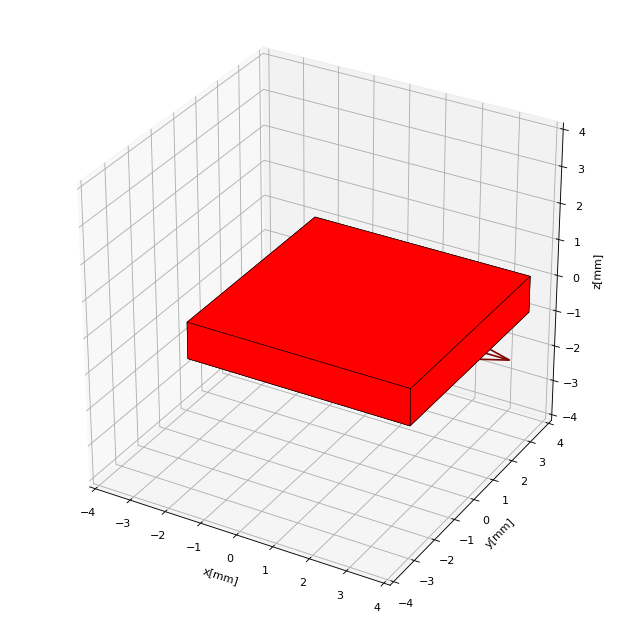

<Figure size 432x288 with 0 Axes>

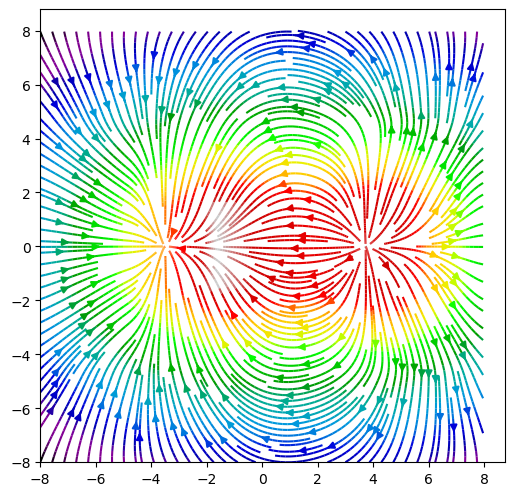

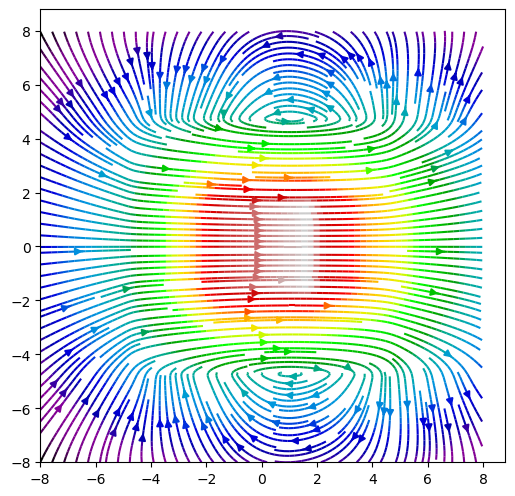

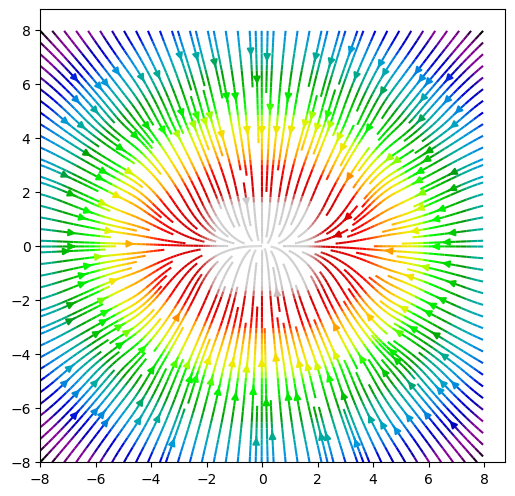

In [3]:

if __name__ == '__main__':
    #Magnitize the magnets all on the same axis.
    num_mags = 12
    mag = [1, 0, 0]
    
    #Set the number of degrees to rotate around.
    theta = .0
    beta = 360 / num_mags
    
    
    
    moebius = magpy.Collection()

    
        
#Print magnet info...
#        print('Magnet:', name)
#        print('Dimension:', dim)
#        print('Coordinates:', pos)
#        print('Rotation about x and y:', theta/2)

#Create the magnet...       
    pos = [1, 0, 0]
    dim = [6, 6, 1]
    name = magpy.source.magnet.Box(mag=mag, dim=dim, pos=pos)
    
#Rotate the magnet around the x and y axis...
#    x_rot = theta/2
#    y_rot = theta/2
#    name.rotate(x_rot, [1, 0, 0])
#    name.rotate(y_rot, [0, 1, 0])
    
    
#Add the magnet to the moebius collection of magnets...        
    moebius.addSources(name)

#        
    theta = theta + beta
    offset = 0
#Rotate the entire moebius collection 90 degrees + offset angle about axis y
#This put Mag1 on the 'bottom'.        
#    moebius.rotate(90 + offset, [0, 1, 0], anchor=[0, 0, 0])
    
#Finally rotate each magnet around the z-axis by z_rot.
#    z_rot=90    
#    moebius.rotate(z_rot, [0, 0, 1])




# plot the magnets on 3D coordinates...
    
    Fig1 = moebius.displaySystem(direc=True)

#Set the magnetic field display parameters...
    
#Magnetic Field Parameters
    density= 3
    map_size = 8
    
#Large sample sizes can impact performance due to magnetic field sampling required.    
    sample_size = 6

# Show the individualt field ( = 1) or not ( = 0)   
    show_fields_xy = 1
    show_fields_xz = 1
    show_fields_yz = 1

#Move the individual planes some offset to see 'layers' of the field.    
    xaxis_offset = 0
    yaxis_offset = 0
    zaxis_offset = 0
#Show x-y plane field (side view)
    if show_fields_xz == True:
    
        xs = linspace(-map_size,map_size,sample_size)
        zs = linspace(-map_size,map_size,sample_size)
        Bs = array([[moebius.getB([x,0,z]) for x in xs] for z in zs])
        
        
        
        Fig3, ay = plt.subplots(num='X-Z Plane', figsize=(6, 6), dpi=100)
        
        X,Z = meshgrid(xs,zs)
# Bs[:,:,0] is all of the x component values (index[0]).
# Bs[:,:,2] is all the z components.
        U,V = Bs[:,:,0], Bs[:,:,2]
        ay.streamplot(X, Z, U, V, color=log(U**2+V**2), cmap='nipy_spectral', \
                      density=density)

#Show x-y plane field (top view)
    if show_fields_xy == True:
    
        xs = linspace(-map_size,map_size,sample_size)
        ys = linspace(-map_size,map_size,sample_size)
        
# Bs is an array of arrays containing 3D vectors   [x, y, z]   
# Bs[:,:,0] is all of the x component values (index[0]).
# Bs[:,:,1] is all the y components.
        
        Bs = array([[moebius.getB([x,y,0]) for x in xs] for y in ys])
#        Fig2, ax = plt.subplots(num='X-Y Plane', figsize=(6, 6), dpi=100)
        Fig2, ax = plt.subplots(num='X-Y Plane', figsize=(6, 6), dpi=100)
        
        X,Y = meshgrid(xs,ys)
        S,T = Bs[:,:,0], Bs[:,:,1]
        ax.streamplot(X, Y, S, T, color=log(S**2+T**2), cmap='nipy_spectral', \
                      density=density)
#        print(xs)
#        print(X)
#        print(ys)
#        print(Y)
#        print(S)
##        print(T)
#        print(' ')
#        print(Bs)
 
#Show y-z plane field (front view)
    if show_fields_yz == True:
    
        ys = linspace(-map_size,map_size,sample_size)
        zs = linspace(-map_size,map_size,sample_size)
        Bs = array([[moebius.getB([0,y,z]) for y in ys] for z in zs])
        
        Fig4, az = plt.subplots(num='Y-Z Plane', figsize=(6, 6), dpi=100)
        
        Y,Z = meshgrid(ys,zs)
# Bs[:,:,1] is all the y components.
# Bs[:,:,2] is all the z components.
        W,X = Bs[:,:,1], Bs[:,:,2]
        az.streamplot(Y, Z, W, X, color=log(W**2+X**2), cmap='nipy_spectral', \
                      density=density)

    
    plt.show()


Dictionary Lookup for type: 'et'
Equalateral Triangle.
a: 3 b: 3 c: 3
All sides are present.
Isosceles triangle formed.
A axis vector: 0.00+2.60j
B axis vector: -2.25-1.30j
C axis vector: 2.25-1.30j
Centroid     : 1.50+0.87j
Satisfying!
a 3.00 A 60.00 b 3.00 B 60.00 c 3.00 C 60.00 h 2.60
Origin found.
Moving Origin to Location: MC
Origin Coordinates (x=1.50, y=0.87)
Making moebius using 12 magnets spaced 30.0 degrees apart.


Magnet: trimag0
Making magnet from triangle object.
A triangle with some meat on it!
Using 3 magnets
Height:2.598 gap:0.000 width:0.866
Coordinates: [10.0, 0.0, 0.0]
Rotation about x: 0.0
Rotation about y: 0.0
Rotation about z: 0


Magnet: trimag1
Making magnet from triangle object.
A triangle with some meat on it!
Using 3 magnets
Height:2.598 gap:0.000 width:0.866
Coordinates: [8.660254037844387, 4.999999999999999, 0.0]
Rotation about x: 15.0
Rotation about y: 15.0
Rotation about z: 0


Magnet: trimag2
Making magnet from triangle object.
A triangle with some meat

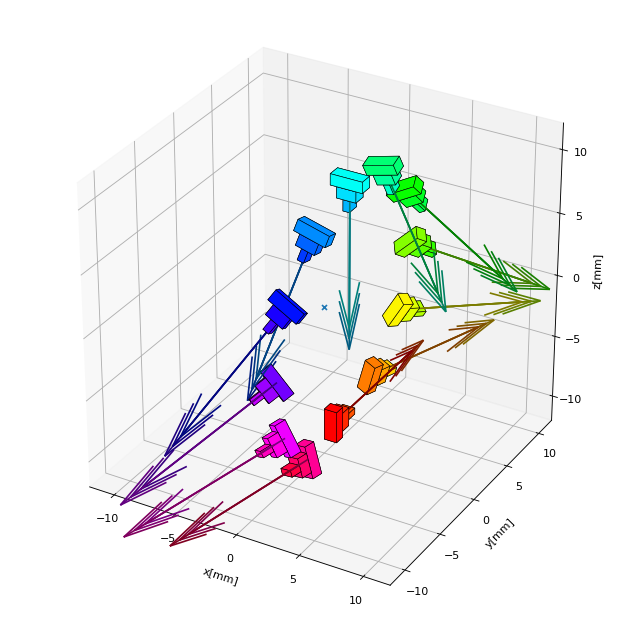

<Figure size 432x288 with 0 Axes>

                    3-Dimensional  X-Y-Z Coordinates


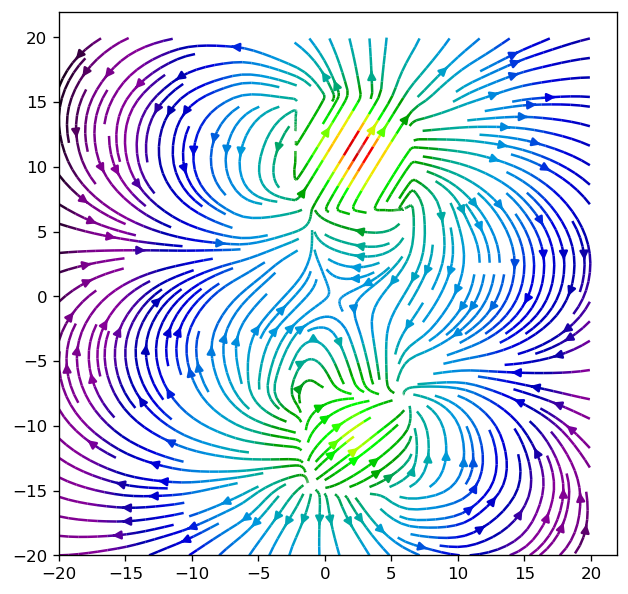

                        X-Y PLANE (TOP VIEW): Z=0


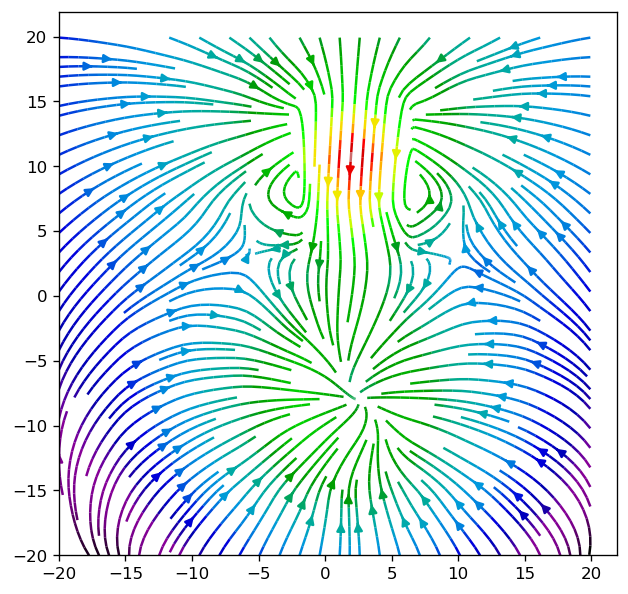

                        X-Z PLANE (SIDE VIEW): Y=0


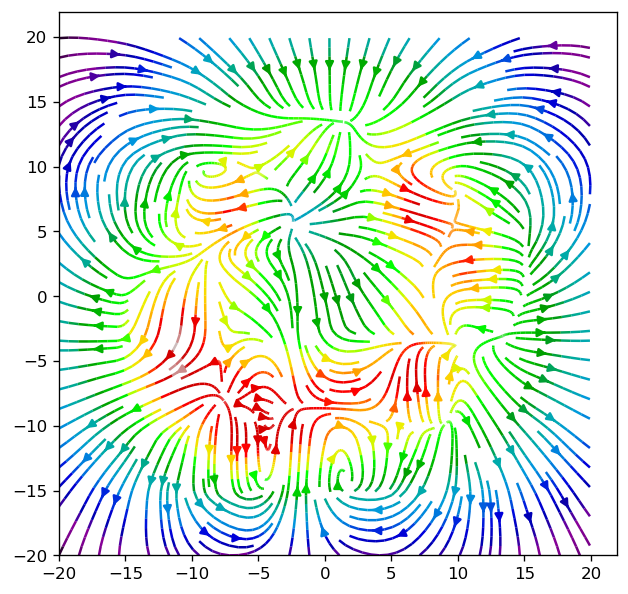

                       Y-Z PLANE (FRONT VIEW): X=0


In [8]:
if __name__ == '__main__':
    #Magnitize the magnets all on the same axis.
    num_trimags = 12
    mag = [0, 1, 0]
    
    #Set the number of degrees to rotate around.
    theta = .0
    beta = 360 / num_trimags
    
    moebius = magpy.Collection()

    
    
    triangle = Triangle(3, 0, 0, 0, 0, 0, 0, Typ='et')
    triangle.Origin('MC')

    print('Making moebius using {} magnets spaced {} degrees apart.'.format(num_trimags, beta))
    
    for source in range(0, num_trimags, 1):

        
        # Apply the Moebius Formula...
        
        R = 10 # radius
        s = 0 # s in subset of {-w, w} (Zero aligns the center along the plane)
        t = radians(theta)

#Determine the position of the magnet in space.
        x_pos = (R + (s * cos(t/2))) * cos(t)
        y_pos = (R + (s * cos(t/2))) * sin(t)
        z_pos = s * sin(t/2)

        pos = [x_pos, y_pos, z_pos]

#Name the magnet...       
        name = 'trimag'+ str(source)
        
#Print magnet info...
        print('\n\n'+'Magnet:', name)

#Create the magnet...       
        name = Trimag(triangle, thick=1, num=3, mag=mag, gap=0)
        print('Coordinates:', pos)
        
#Rotate the magnet around the x and y axis...
        x_rot = theta/2
        y_rot = theta/2
        z_rot = 0 #theta/2
        print('Rotation about x:', x_rot)
        print('Rotation about y:', y_rot)
        print('Rotation about z:', z_rot)
        name.collect.rotate(x_rot, axis=[1,0,0], anchor = [1, 0, 0])
        name.collect.rotate(y_rot, axis=[0,1,0], anchor = [1, 0, 0])
        name.collect.rotate(z_rot, axis=[0,0,1], anchor = [1, 0, 0])

        theta = theta + beta
#End of making sources.     
        
        name.collect.move(pos)
        
#Add the magnet to the moebius collection of magnets...        
        moebius.addSources(name.collect)

#        
#Rotate the entire moebius collection 90 degrees + offset angle about axis y
#This put Mag1 on the 'bottom'.        
    rotation = 90
    tilt = 0
    moebius.rotate(rotation + tilt, [0, 1, 0], anchor=[1, 0, 0])
    




# plot the magnets on 3D coordinates...
    
    Fig1 = moebius.displaySystem(direc=True)
    plt.show()
    print('                    3-Dimensional  X-Y-Z Coordinates')
    

#Set the magnetic field display parameters...
    
#Magnetic Field Parameters
    density= 2
    map_size = 10
    sample_size = 10
    

# Show the individualt plane fields ( = 1) or not ( = 0)   
    show_fields_xy = 1
    show_fields_xz = 1
    show_fields_yz = 1
    
    x_map = 20
    y_map = 20
    z_map = 20
    
    x_sample = 10
    y_sample = 10
    z_sample = 10
    
    xs = linspace(-x_map,x_map,x_sample)
    ys = linspace(-y_map,y_map,y_sample)
    zs = linspace(-z_map,z_map,z_sample)
    

#Move the individual planes some offset to see 'layers' of the field.    
    xax_off = 0
    yax_off = 0
    zax_off = 0
    
#Show x-y plane field    
    if show_fields_xy == True:
        
        Bs = array([[moebius.getB([x,y,zax_off]) for x in xs] for y in ys])
        X,Y = meshgrid(xs,ys)
        S,T = Bs[:,:,0], Bs[:,:,1]
        
        Fig2, ax = plt.subplots(figsize=(6, 6), dpi=120)
        
        ax.streamplot(X, Y, S, T, color=log(S**2+T**2), cmap='nipy_spectral', density=density)
        plt.show()
        print('                        X-Y PLANE (TOP VIEW): Z={}'.format(zax_off))


 
#Show x-z plane field    
    if show_fields_xz == True:
    
        Bs = array([[moebius.getB([x,yax_off,z]) for x in xs] for z in zs])
        X,Z = meshgrid(xs,zs)
        U,V = Bs[:,:,0], Bs[:,:,2]
        
        Fig3, ay = plt.subplots(figsize=(6, 6), dpi=120)
        ay.streamplot(X, Z, U, V, color=log(U**2+V**2), cmap='nipy_spectral', \
                      density=density)
        plt.show()
        print('                        X-Z PLANE (SIDE VIEW): Y={}'.format(yax_off))


#Show y-z plane field    
    if show_fields_yz == True:
    
        Bs = array([[moebius.getB([xax_off,y,z]) for y in ys] for z in zs])
        Y,Z = meshgrid(ys,zs)
        W,X = Bs[:,:,1], Bs[:,:,2]
        
        Fig4, az = plt.subplots(figsize=(6, 6), dpi=120)
        az.streamplot(Y, Z, W, X, color=log(W**2+X**2), cmap='nipy_spectral', \
                      density=density)


        plt.show()
        print('                       Y-Z PLANE (FRONT VIEW): X={}'.format(xax_off))
